In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/kaggle/input/aqi-quality/cleaned_delhi_air_quality_data.csv'  # Update with your file path
aqi_data = pd.read_csv(file_path)

In [4]:
aqi_data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [3]:
# Data Preprocessing: Clean and normalize the data
# Dropping the 'date' column
aqi_data_clean = aqi_data.drop(columns=['date'])

In [5]:
# Handle missing values (filling with mean values)
aqi_data_clean.fillna(aqi_data_clean.mean(), inplace=True)


In [6]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(aqi_data_clean)

In [7]:
# Define target (AQI_Bucket) based on PM2.5 values
def categorize_aqi(pm2_5):
    if pm2_5 <= 50:
        return 0  # Good
    elif pm2_5 <= 100:
        return 1  # Moderate
    elif pm2_5 <= 150:
        return 2  # Unhealthy for sensitive groups
    elif pm2_5 <= 200:
        return 3  # Unhealthy
    elif pm2_5 <= 300:
        return 4  # Very Unhealthy
    else:
        return 5  # Hazardous

In [8]:
aqi_data_clean['AQI_Bucket'] = aqi_data_clean['pm2_5'].apply(categorize_aqi)

In [9]:
# Split features and target variable
X = aqi_data_clean.drop(columns=['AQI_Bucket'])
y = aqi_data_clean['AQI_Bucket']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [12]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [13]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

In [14]:
# Predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [15]:
# Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

rf_classification_report = classification_report(y_test, rf_predictions)
gb_classification_report = classification_report(y_test, gb_predictions)

rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)

In [16]:
# Print Results
print("Random Forest Accuracy: ", rf_accuracy)
print("Gradient Boosting Accuracy: ", gb_accuracy)

print("\nRandom Forest Classification Report:\n", rf_classification_report)
print("\nGradient Boosting Classification Report:\n", gb_classification_report)


Random Forest Accuracy:  0.999560536145902
Gradient Boosting Accuracy:  0.999560536145902

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      1149
           2       1.00      1.00      1.00       895
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00       708
           5       1.00      1.00      1.00       577

    accuracy                           1.00      4551
   macro avg       1.00      1.00      1.00      4551
weighted avg       1.00      1.00      1.00      4551


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      1149
           2       1.00      1.00      1.00       895
           3       1.00      1.00      1.00       610
           4  

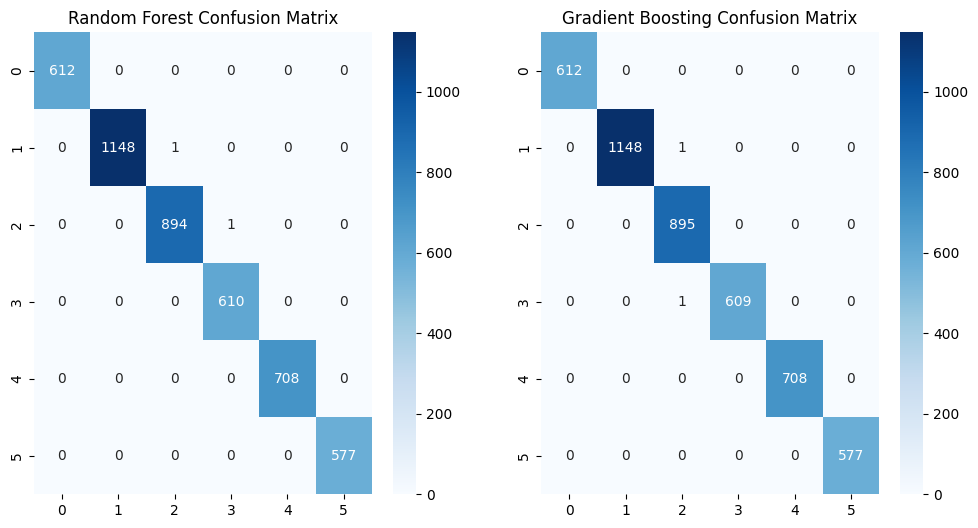

In [17]:
# Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
sns.heatmap(gb_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Gradient Boosting Confusion Matrix')

plt.show()